<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/Ensemble%20Methods%20with%20Random%20Forests/Ensemble_Methods_with_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods / Random Forests Implementation
## Introduction

Ensemble learning is a useful tool because it combines multiple simple learning algorithms which may not have high accuracy individually and uses a majority voting system to select the result most commonly chosen among the simple models, which has a much higher accuracy result overall. This implementation considers three methods:
1. Hard voting
2. Bagging, and
3. Random forests

By implementing these various algorithms, we can determine not only which are more accuracte classifiers on the penguins dataset but also how they can work together to improve overall performance.

## Imports and Data Loading

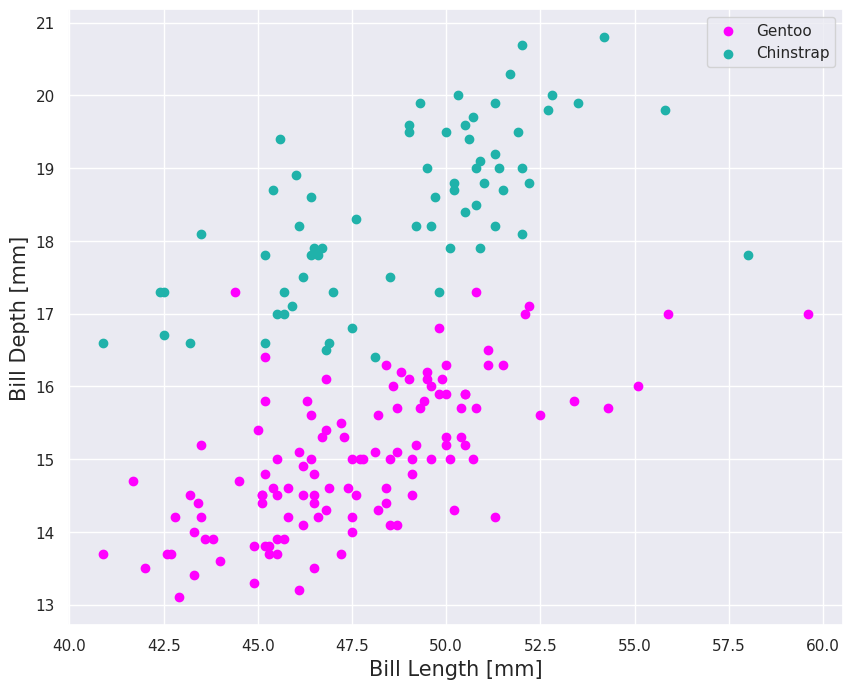

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()  # Remove rows with missing values

# Select only Adelie and Gentoo species
penguins = penguins[penguins['species'].isin(['Gentoo', 'Chinstrap'])]

# Extract features for plotting
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Gentoo":
        return 0
    else:
        return 1

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
species = ["Gentoo", "Chinstrap"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize=(10, 8))
for species_name, color in zip(species, colors):
    temp_df = penguins[penguins.species == species_name]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c=color,
               label=species_name)

ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend()
plt.show()


Note above that the data is not linearly seperable, i.e., no singular model would be able to learn the data with 100% accuracy. This is a reason that especially for the values in overlapping areas, ensemble learning can be extra insightful.

## Importing Classifiers and Testing Accuracy

In [ ]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method
from sklearn.ensemble import VotingClassifier

# split training data
from sklearn.model_selection import train_test_split

# import metric
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
        )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.88
logistic regression accuracy: 0.96
random forest accuracy: 0.9866666666666667
voting classifier accuracy: 0.96


## Bagging
Bagging is an abbreviation for "bootstrap aggregating", and it can be used for classification or regression. Bootstrapping is a method of data collection in which one takes a random sample from a population and analyzes it, where between each sample taken the used data is replaced (meaning any random draw from the population could yeild both new and/or previously used data points). Combining multiple models which were trained that way is bootstrap aggregating. For classification, this could be implemented as a majority vote. For regression, this would mean taking the average of the various models' predicitons or interpretations of the population.

In [ ]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        46
           1       0.85      1.00      0.92        29

    accuracy                           0.93        75
   macro avg       0.93      0.95      0.93        75
weighted avg       0.94      0.93      0.93        75
 

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.91      1.00      0.95        29

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75
 



Of note here, "precision" and "recall" refer to two different ways of analyzing the accuracy of a model based on the types of mistakes it makes:
- *Precision* measures the accuracy of the positive predictions made by the model. Specifically, it is the ratio of true positive predictions (correctly predicted positive instances) to all the instances that were predicted as positive (true positives + false positives).
- *Recall* (also known as sensitivity or true positive rate) measures the ability of the model to correctly identify all positive instances in the dataset. It is the ratio of true positive predictions to all the actual positive instances (true positives + false negatives).

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.88      0.97      0.92        29

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75
 



Looks like our tree classification had the best f-1 score of 96%, with the others not far behind. Let's visualize the classification regions below.

## Visualize the Classification by Method

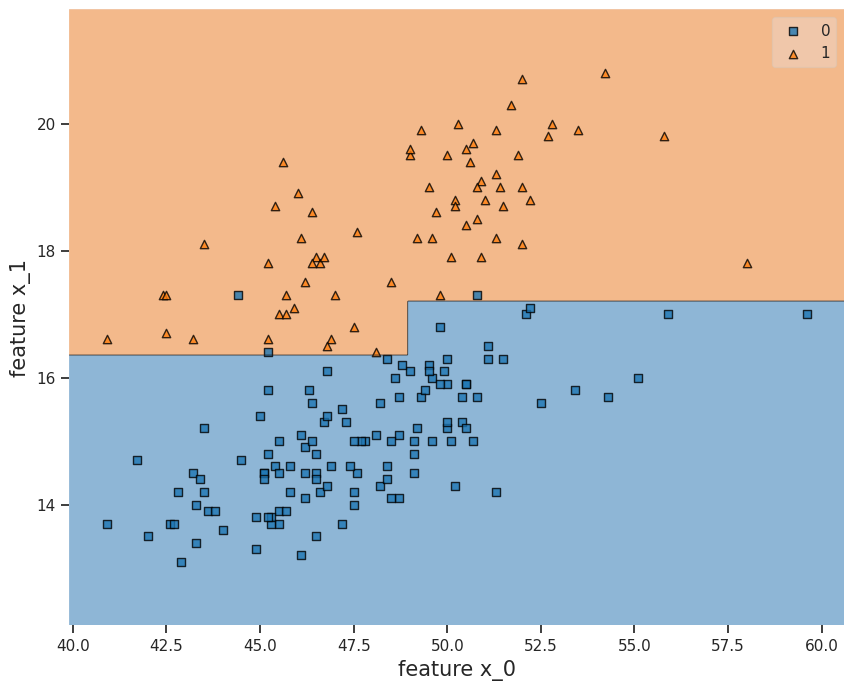

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

According to the above visualization, only 3 blue points are misclassified. For 100% accuracy, you'd want all of the blue squares in the blue area and all of the orange triangles in the orange area.

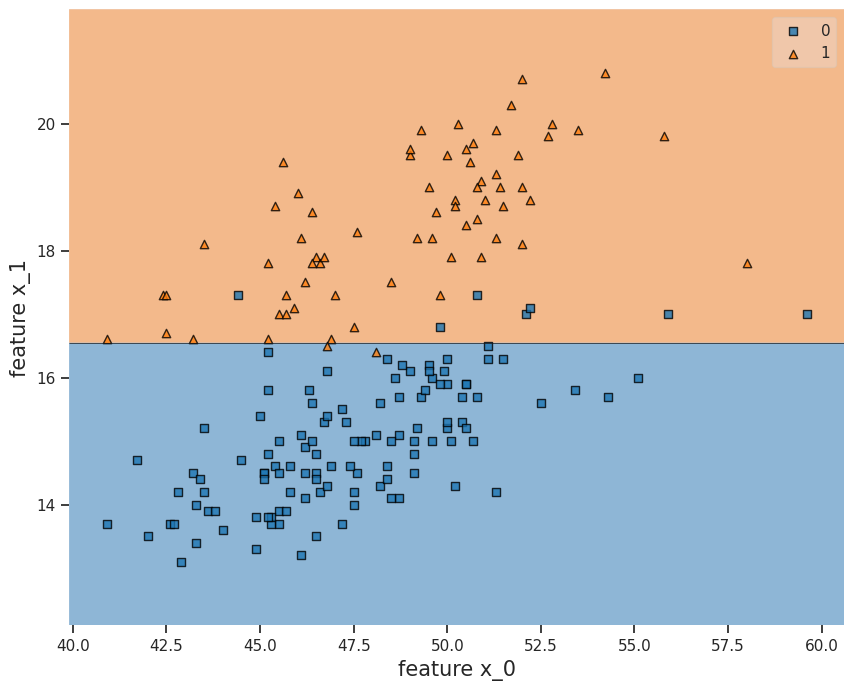

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

This figure has 7 blue points and 2 orange points incorrectly classified - a little worse than the previous model.

## Random Forests

The bagging model demonstrated above is the DecisionTreeClassifier class in the sklearn.ensemble module, which is technically a random forest. But the RandomForestClassifier implemented below results in a lower variance. This is due to increased randomness when creating the trees. Let's see how it performs below.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



Tree Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.91      0.97      0.94        32

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75
 



In [ ]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.91      0.97      0.94        32

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75
 



These are pretty consistently high performances (an f-1 score near 1.0 is good; 1.0 itself would be perfect classification). However, it can be difficult to see what is different about the models if the numbers in the charts above match. To sort this out, let's implement a visual comparison.

## Visualizing the Classification by Method, Random Forests

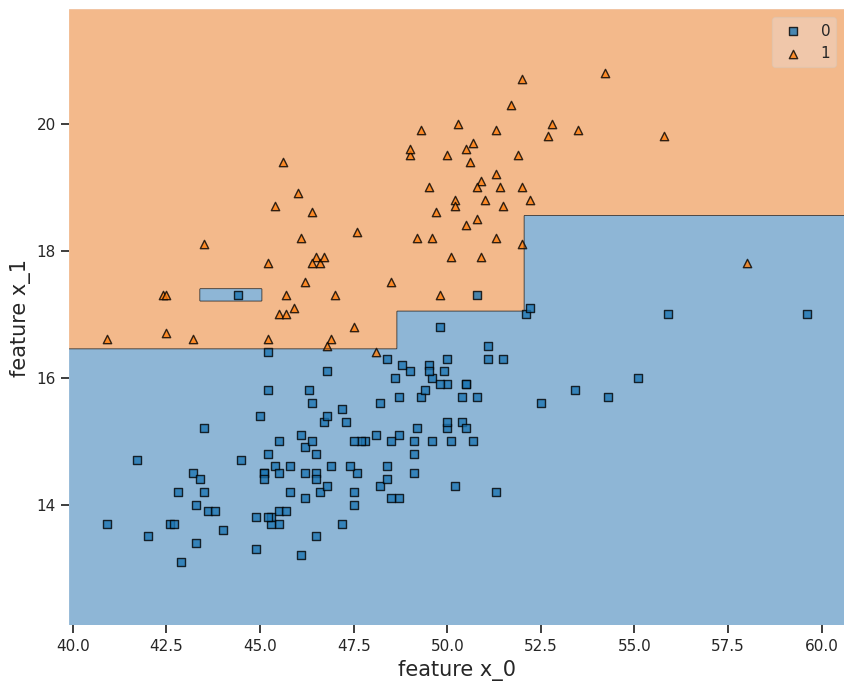

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

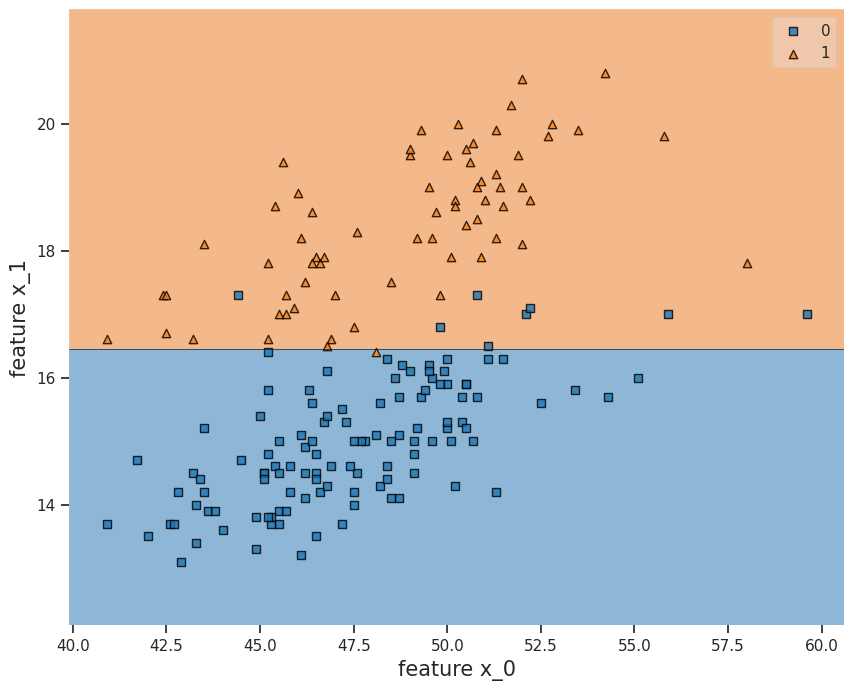

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

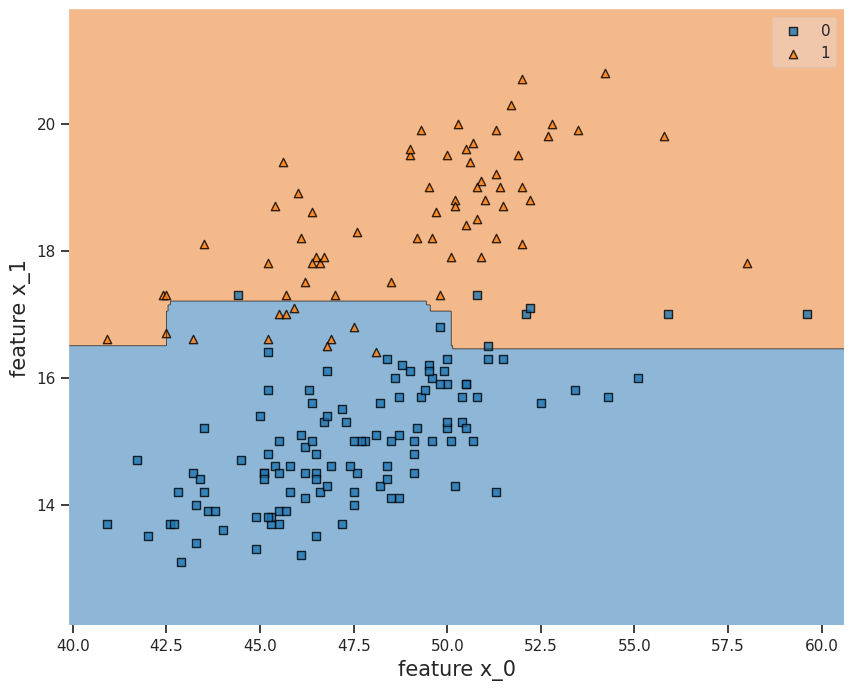

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Now it is more apparent that while resulting in similar accuracy, each model has a notably different approach.

It's also possible to improve the performance by considering more features from the dataset. Let's try these same models using two more parameters.

## Implement with 4 Parameters (Instead of 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 5)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.98        32

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.91      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75
 



In [ ]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.91      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75
 



In [ ]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.91      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75
 



Looking through these scores, it appears the tree classification performed the best with 99% accuracy! Adding features did improve the overall performance.

## Feature Importance

One more aspect of random forests is their ability to indicate the importance, or the impact, of each parameter on the model.



In [ ]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.011658967906918234
bill_depth_mm 0.3161706622291164
flipper_length_mm 0.4613683542481727
body_mass_g 0.21080201561579276


Looks like the most important or impactful parameter in this data set amongst the models was the flipper length, followed by bill depth! Bill length was an oder of magnitude less relevant than all other parameters.